In [1]:
from torch.utils.data import DataLoader
from dataset import WS_UNI_HER2ST

dataset = WS_UNI_HER2ST(train=False, fold=5)
train_loader = DataLoader(dataset, batch_size=1, num_workers=4, shuffle=False)

/opt/saturncloud/envs/thaind/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading imgs...
Loading metadata...


In [2]:
# Lấy batch đầu tiên từ dataloader
p0, p1, p2, pos, exp, _ = next(iter(train_loader))

In [ ]:
p0.shape
p0.min(), p0.max()

In [ ]:
from models.WS_UNI import WS_UNI
import torch

model = WS_UNI.load_from_checkpoint("model_ckpts/WS_UNI/WS_UNI_every5epoch_-htg_her2st_785_32_cv_5_epoch=49.ckpt", n_layers=8, uni_ckpt_path="model_ckpts/UNI_v2/UNI_every5epoch_-htg_her2st_785_32_cv_5_epoch=44.ckpt", n_genes=785, learning_rate=1e-5, max_epochs=50)
device = torch.device("cuda")

In [ ]:
import torch.nn.functional as F

model.eval()
model.to(device)

with torch.no_grad():
    p0, p1, p2, pos, exp = p0.to(device), p1.to(device), p2.to(device), pos.to(device), exp.to(device)

    pred = model(p0, p1, p2, pos)
    
    loss = F.mse_loss(pred.view_as(exp), exp)
    
    print(pred.shape, exp.shape)
    
    print(loss) 

In [ ]:
pred

In [ ]:
exp

In [3]:
import matplotlib.pyplot as plt

# Hàm hiển thị ảnh sau khi unnormalize
def show_tensor_image(tensor, title=""):
    print(tensor.shape)
    img = tensor.permute(1, 2, 0).cpu().numpy()
    print(img.max(), img.min(), img.shape)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8267832..2.4831376].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8096584..2.1345534].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4329139..2.1519828].


torch.Size([3, 224, 224])
2.4831376 -1.8267832 (224, 224, 3)
torch.Size([3, 224, 224])
2.1345534 -1.8096584 (224, 224, 3)
torch.Size([3, 224, 224])
2.1519828 -1.4329139 (224, 224, 3)


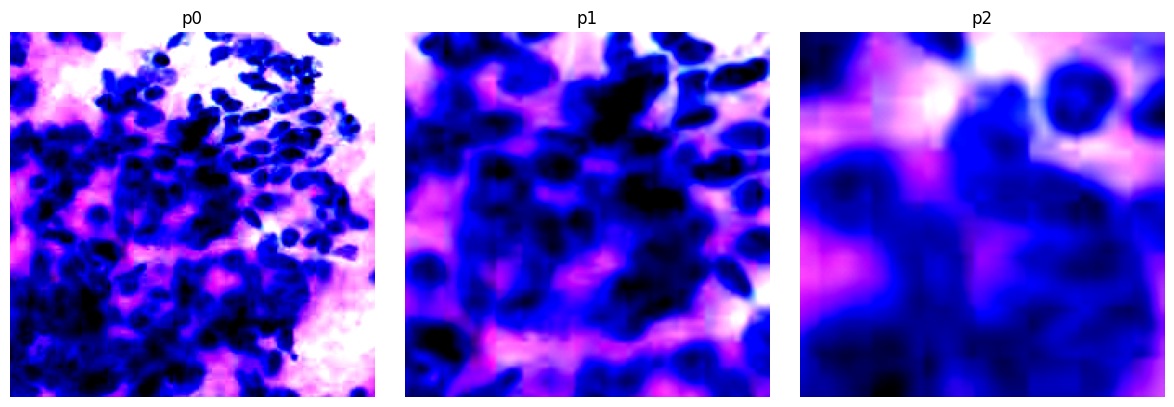

In [6]:
# Hiển thị ảnh đầu tiên trong batch của mỗi tensor
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
show_tensor_image(p0[0, 128], title='p0')

plt.subplot(1, 3, 2)
show_tensor_image(p1[0, 128], title='p1')

plt.subplot(1, 3, 3)
show_tensor_image(p2[0, 128], title='p2')

plt.tight_layout()
plt.show()